In [2]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
import math

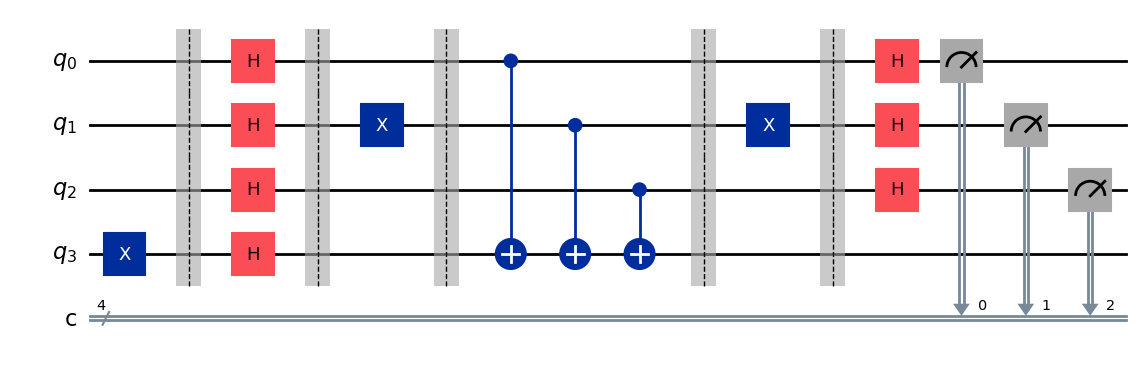

In [10]:
# Define constant oracle function
def constant_oracle(circuit):
    # Do nothing
     pass

# Define balanced oracle function
def balanced_oracle(circuit):
    # Circuit shown in exercise
    # For visual clarity we add 2 more barriers
    circuit.barrier()
    circuit.x(qreg[1])
    circuit.barrier()
    circuit.cx(qreg[0], qreg[3])
    circuit.cx(qreg[1], qreg[3])
    circuit.cx(qreg[2], qreg[3])
    circuit.barrier()
    circuit.x(qreg[1])
    circuit.barrier()
    
# Deutsch-Josza algorithm
oracle_func = balanced_oracle

qreg = QuantumRegister(4, 'q')
creg = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg, creg)

# Set last qubit to state |1>
circuit.x(qreg[-1])
circuit.barrier()

# Set all qubits in superposition
circuit.h(qreg[:])

# Apply oracle function to circuit
oracle_func(circuit)

# Put all qubits except the last out of superposition 
circuit.h(qreg[:-1])

# Lastly measure all qubits except the last
circuit.measure(qreg[:-1], creg[:-1])

circuit.draw("mpl")


## Executing on Qiskit Simulator

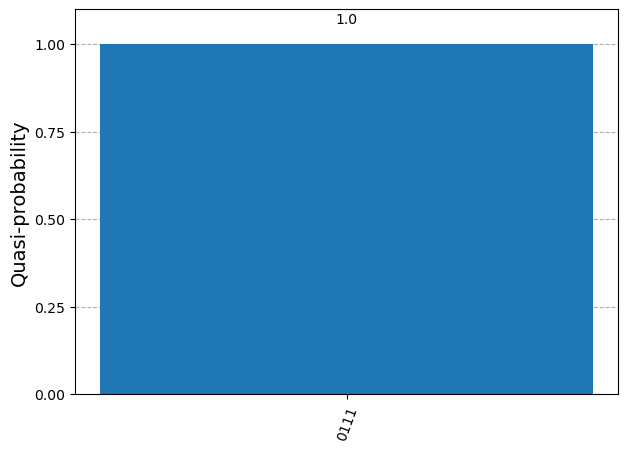

In [25]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService

# Initialize Aer Simulator
aer_sim = AerSimulator()

# Generate instructions for sampler
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(circuit)

# Create session using simulator and run
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()._pub_results[0].data.c.get_counts()

plot_distribution(result)

## Executing on Quantum Computer

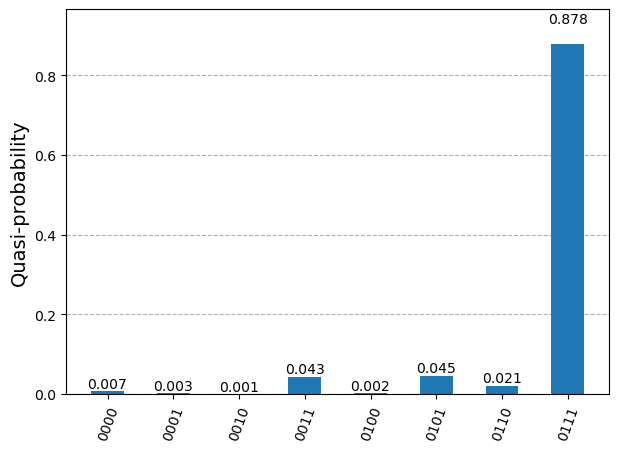

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Load account from token file
with open("token.txt", "r") as f:
    token = f.readlines()[0]

service = QiskitRuntimeService()
service.save_account(channel="ibm_quantum", token=token, overwrite=True, set_as_default=True)

# Choose backend, for ease of use we pick the least busy one
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=2)

# Generate instructions for sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(circuit)

# Create session for a Quantum Computer and run
with Session(backend=backend) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()._pub_results[0].data.c.get_counts()

plot_distribution(result)